In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Salary_data.csv')
df.dropna(inplace=True)

In [3]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


Text(0, 0.5, 'Salary')

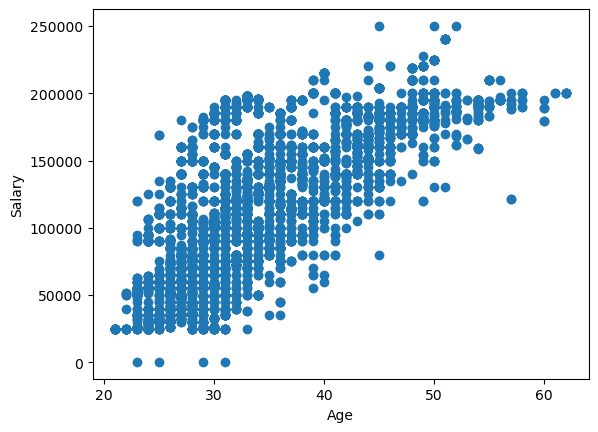

In [4]:
plt.scatter(df.Age,df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')

In [5]:
from sklearn.cluster import KMeans

In [6]:
km=KMeans(n_clusters=3)
# km.fit(df[['Age','Salary']])
y_predicted = km.fit_predict(df[['Age','Salary']])
y_predicted

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 1, ..., 2, 0, 2])

In [7]:

df['cluster']= y_predicted
df.head(20)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,cluster
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,2
4,52.0,Male,Master's,Director,20.0,200000.0,1
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,2
6,42.0,Female,Master's,Product Manager,12.0,120000.0,0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,2
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,2
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,0


In [8]:
km.cluster_centers_

array([[3.31948765e+01, 1.17255000e+05],
       [4.05114219e+01, 1.78134928e+05],
       [2.77760879e+01, 5.66356088e+04]])

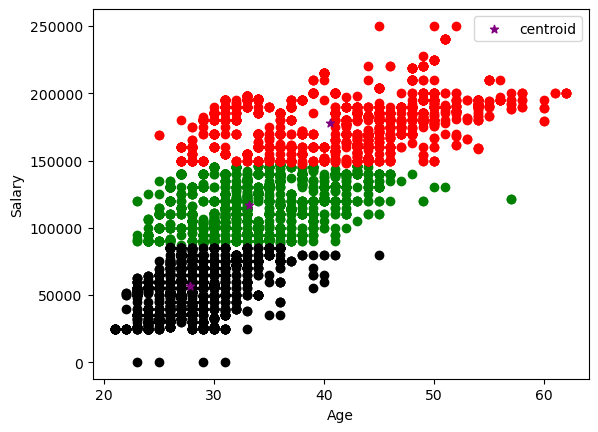

In [9]:
df1= df[df.cluster==0]
df2 = df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1.Age,df1.Salary,color='green')
plt.scatter(df2.Age,df2.Salary,color="red")
plt.scatter(df3.Age,df3.Salary,color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="*",label='centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(df[['Salary']])
df['Salary'] = scaler.transform(df[['Salary']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,cluster
0,0.268293,Male,Bachelor's,Software Engineer,5.0,0.359103,0
1,0.170732,Female,Master's,Data Analyst,3.0,0.258963,2
2,0.585366,Male,PhD,Senior Manager,15.0,0.599439,1
3,0.365854,Female,Bachelor's,Sales Associate,7.0,0.238935,2
4,0.756098,Male,Master's,Director,20.0,0.799720,1


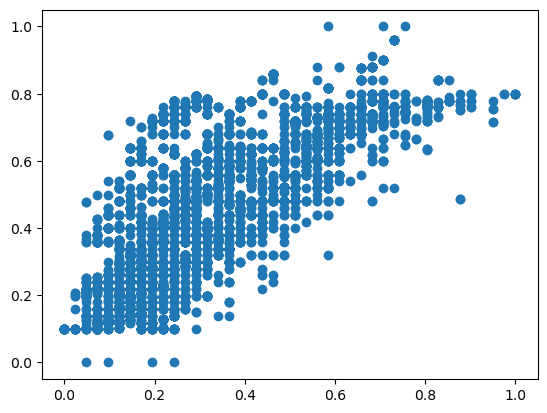

In [13]:
plt.scatter(df.Age,df.Salary)

In [14]:
km=KMeans(n_clusters=3)
# km.fit(df[['Age','Salary']])
y_predicted = km.fit_predict(df[['Age','Salary']])
y_predicted

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 2, ..., 1, 2, 1])

In [15]:
df['cluster']= y_predicted
df.head(20)
km.cluster_centers_

array([[0.30646202, 0.55987813],
       [0.166323  , 0.25170245],
       [0.60964672, 0.71383318]])

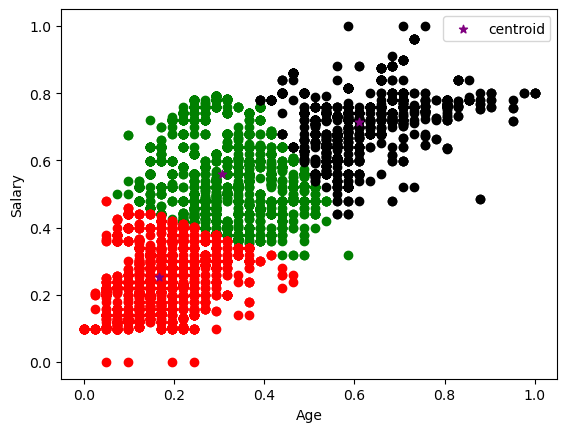

In [16]:
df1= df[df.cluster==0]
df2 = df[df.cluster==1]
df3= df[df.cluster==2]
plt.scatter(df1.Age,df1.Salary,color='green')
plt.scatter(df2.Age,df2.Salary,color="red")
plt.scatter(df3.Age,df3.Salary,color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="*",label='centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [17]:
sse =[]
k_rng = range(1,10)
for i in k_rng:
    km=KMeans(n_clusters=i)
    km.fit(df[['Age','Salary']])
    sse.append(km.inertia_)
    
sse

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[530.5140854910404,
 199.6391041989837,
 117.88431534811022,
 88.07265604661671,
 71.2955922619324,
 59.590881366897136,
 51.35518289925362,
 44.52590123050487,
 39.6175705206658]

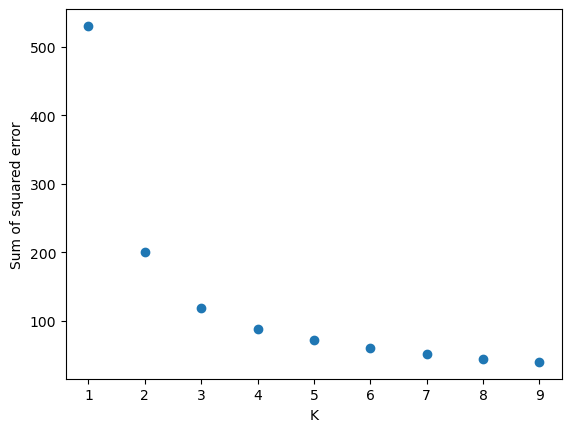

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.scatter(k_rng,sse)